## Read Data from stock API Alphavantage

In [20]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [21]:
api_key = 'R8QIQBLESTB8SZW7'
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN"]

def get_price_data(symbol):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize=full&apikey={api_key}'
    r = requests.get(url)
    raw_df = r.json()
    res = pd.DataFrame(raw_df['Time Series (Daily)']).T
    res = res[['4. close']]
    res.rename(columns={'4. close': f'{symbol}', 'index': 'date'}, inplace=True)
    return res

### create dataframe with stocks

In [22]:
prices = []

for symbol in symbols:
    prices.append(get_price_data(symbol))
    
df = pd.concat([prices[0], prices[1], prices[2], prices[3]], axis=1)

df

,AAPL,MSFT,GOOGL,AMZN
2021-11-29,160.24,336.63,2910.61,3561.57
2021-11-26,156.81,329.68,2843.66,3504.56
2021-11-24,161.94,337.91,2922.4,3580.41
2021-11-23,161.41,337.68,2915.64,3580.04
2021-11-22,161.02,339.83,2926.04,3572.57
...,...,...,...,...
1999-11-05,88.31,91.56,NaN,64.94
1999-11-04,83.62,91.75,NaN,63.06
1999-11-03,81.5,92.0,NaN,65.81
1999-11-02,80.25,92.56,NaN,66.44


In [23]:
df.reset_index(inplace=True)
df

,index,AAPL,MSFT,GOOGL,AMZN
0,2021-11-29,160.24,336.63,2910.61,3561.57
1,2021-11-26,156.81,329.68,2843.66,3504.56
2,2021-11-24,161.94,337.91,2922.4,3580.41
3,2021-11-23,161.41,337.68,2915.64,3580.04
4,2021-11-22,161.02,339.83,2926.04,3572.57
...,...,...,...,...,...
5551,1999-11-05,88.31,91.56,NaN,64.94
5552,1999-11-04,83.62,91.75,NaN,63.06
5553,1999-11-03,81.5,92.0,NaN,65.81
5554,1999-11-02,80.25,92.56,NaN,66.44


In [24]:
df.rename(columns={'index':'date'}, inplace=True)
df

,date,AAPL,MSFT,GOOGL,AMZN
0,2021-11-29,160.24,336.63,2910.61,3561.57
1,2021-11-26,156.81,329.68,2843.66,3504.56
2,2021-11-24,161.94,337.91,2922.4,3580.41
3,2021-11-23,161.41,337.68,2915.64,3580.04
4,2021-11-22,161.02,339.83,2926.04,3572.57
...,...,...,...,...,...
5551,1999-11-05,88.31,91.56,NaN,64.94
5552,1999-11-04,83.62,91.75,NaN,63.06
5553,1999-11-03,81.5,92.0,NaN,65.81
5554,1999-11-02,80.25,92.56,NaN,66.44


In [25]:
df.dtypes

date     object
AAPL     object
MSFT     object
GOOGL    object
AMZN     object
dtype: object

In [26]:
df["AAPL"] = df.AAPL.astype(float)
df["MSFT"] = df.MSFT.astype(float)
df["GOOGL"] = df.GOOGL.astype(float)
df['AMZN'] = df.AMZN.astype(float)
#df['date'] =  pd.to_datetime(df['date'], format='%Y-%M-%d')
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [27]:
df.dtypes

date     datetime64[ns]
AAPL            float64
MSFT            float64
GOOGL           float64
AMZN            float64
dtype: object

In [28]:
df2 = pd.melt(df, id_vars=['date'], value_vars=['AAPL', 'MSFT', 'GOOGL', 'AMZN'])
df2

,date,variable,value
0,2021-11-29,AAPL,160.24
1,2021-11-26,AAPL,156.81
2,2021-11-24,AAPL,161.94
3,2021-11-23,AAPL,161.41
4,2021-11-22,AAPL,161.02
...,...,...,...
22219,1999-11-05,AMZN,64.94
22220,1999-11-04,AMZN,63.06
22221,1999-11-03,AMZN,65.81
22222,1999-11-02,AMZN,66.44


In [29]:
df

,date,AAPL,MSFT,GOOGL,AMZN
0,2021-11-29,160.24,336.63,2910.61,3561.57
1,2021-11-26,156.81,329.68,2843.66,3504.56
2,2021-11-24,161.94,337.91,2922.40,3580.41
3,2021-11-23,161.41,337.68,2915.64,3580.04
4,2021-11-22,161.02,339.83,2926.04,3572.57
...,...,...,...,...,...
5551,1999-11-05,88.31,91.56,NaN,64.94
5552,1999-11-04,83.62,91.75,NaN,63.06
5553,1999-11-03,81.50,92.00,NaN,65.81
5554,1999-11-02,80.25,92.56,NaN,66.44


### first plotting stocks

In [35]:
fig = px.line(df2, x="date", y="value", color='variable')
fig.show()

In [10]:
#df.isnull().sum()

In [11]:
#df.dropna(inplace=True)
#df

In [12]:
#df.isnull().sum()

### import stocks dataset from GCP

In [13]:
from google.cloud import storage
def get_stocks_news_data_from_gcp(nrows=10000, local=False, optimize=False, **kwargs):
    """method to get the training data (or a portion of it) from google cloud bucket"""
    # Add Client() here
    client = storage.Client()
    if local:
        path = "data/data_data_10Mill.csv"
    else:
        path = "gs://stock-news-pred-bucket/stock_prices"
    df = pd.read_csv(path, sep='\t')#add nrows after if you want to select a specific number of row
    return df

In [14]:
df = get_stocks_news_data_from_gcp()

In [17]:
df.drop(columns="Unnamed: 0", inplace= True)

In [19]:
df

,AAPL,MSFT,GOOGL,AMZN
0,161.02,339.83,2926.04,3572.57
1,160.55,343.11,2978.53,3676.57
2,157.87,341.27,2996.77,3696.06
3,153.49,339.12,2960.94,3549.00
4,151.00,339.51,2957.52,3540.70
...,...,...,...,...
5547,88.31,91.56,NaN,64.94
5548,83.62,91.75,NaN,63.06
5549,81.50,92.00,NaN,65.81
5550,80.25,92.56,NaN,66.44


In [18]:
amzn = df[['AMZN']]
amzn

,AMZN
0,3572.57
1,3676.57
2,3696.06
3,3549.00
4,3540.70
...,...
5547,64.94
5548,63.06
5549,65.81
5550,66.44


## Preprocessing data for model

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X=amzn

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_scaled

array([[0.93910786],
       [0.95946787],
       [0.95936856],
       ...,
       [0.01606253],
       [0.01623164],
       [0.0169537 ]])

In [39]:
df_X_scaled = pd.DataFrame(X_scaled, columns=['AMZN'])
df_X_scaled

,AMZN
0,0.939108
1,0.959468
2,0.959369
3,0.957363
4,0.985280
...,...
5550,0.015829
5551,0.015324
5552,0.016063
5553,0.016232


### create a train test split

In [40]:
# TODO : create a function to reuse

train_size = 0.8
index = round(train_size*X.shape[0])
X_scaled_train = df_X_scaled.iloc[:index]
X_scaled_test = df_X_scaled.iloc[index:]

In [41]:
print(X_scaled_train.shape)
print(X_scaled_test.shape)

(4444, 1)
(1111, 1)


In [42]:
#TODO: create a function to reuse
X_train = []
y_train = []
for i in range(30, 4442):
    X_train.append(X_scaled_train.iloc[i-30:i, 0])
    y_train.append(X_scaled_train.iloc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
X_train.shape

(4412, 30, 1)

In [44]:
#TODO: create a function to reuse
X_test = []
y_test = []
for i in range(30, 1111):
    X_test.append(X_scaled_test.iloc[i-30:i, 0])
    y_test.append(X_scaled_test.iloc[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [45]:
X_test.shape

(1081, 30, 1)

In [46]:
X_train.shape

(4412, 30, 1)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping

## Model

### First model test

In [48]:
def inverse_transformer(y):
    y = np.c_[y, np.ones(len(y))]
    y = scaler.inverse_transform(y)
    y = y[:,0]
    return y

In [49]:
es = EarlyStopping(patience=30, restore_best_weights=True)

test_regressor = Sequential()

test_regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

test_regressor.add(LSTM(units = 50, return_sequences = True))

test_regressor.add(LSTM(units = 50, return_sequences = True))

test_regressor.add(LSTM(units = 50))

test_regressor.add(Dense(units = 1))

test_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

test_regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.3, callbacks=[es])

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
test_predicted_stock_price = test_regressor.predict(X_test)
test_predicted_stock_price = scaler.inverse_transform(test_predicted_stock_price)
y_test_transformed = inverse_transformer(y_test)

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y_test_transformed, color = 'black', label = 'AMZN Stock Price')
plt.plot(test_predicted_stock_price, color = 'green', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()

### Improved model

In [50]:
es = EarlyStopping(patience=30, restore_best_weights=True)

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.3, callbacks=[es])

Epoch 1/100
97/97 [==============================] - 85s 560ms/step - loss: 0.0112 - val_loss: 2.1226e-05
Epoch 2/100
97/97 [==============================] - 51s 521ms/step - loss: 0.0023 - val_loss: 1.7276e-05
Epoch 3/100
97/97 [==============================] - 47s 482ms/step - loss: 0.0016 - val_loss: 1.4463e-05
Epoch 4/100
97/97 [==============================] - 53s 543ms/step - loss: 0.0018 - val_loss: 2.0875e-04
Epoch 5/100
97/97 [==============================] - 53s 551ms/step - loss: 0.0017 - val_loss: 8.4974e-06
Epoch 6/100
97/97 [==============================] - 43s 444ms/step - loss: 0.0016 - val_loss: 3.6523e-05
Epoch 7/100
97/97 [==============================] - 48s 492ms/step - loss: 0.0015 - val_loss: 1.2812e-04
Epoch 8/100
97/97 [==============================] - 59s 607ms/step - loss: 0.0013 - val_loss: 1.5404e-05
Epoch 9/100
97/97 [==============================] - 56s 570ms/step - loss: 0.0014 - val_loss: 2.2396e-05
Epoch 10/100
97/97 [==========================

Epoch 76/100
97/97 [==============================] - 46s 474ms/step - loss: 7.7330e-04 - val_loss: 3.7437e-06
Epoch 77/100
97/97 [==============================] - 57s 586ms/step - loss: 7.2278e-04 - val_loss: 4.2721e-05
Epoch 78/100
97/97 [==============================] - 51s 531ms/step - loss: 7.6948e-04 - val_loss: 1.5712e-04
Epoch 79/100
97/97 [==============================] - 45s 466ms/step - loss: 6.7692e-04 - val_loss: 1.0425e-04
Epoch 80/100
97/97 [==============================] - 48s 492ms/step - loss: 6.7145e-04 - val_loss: 1.4322e-05
Epoch 81/100
97/97 [==============================] - 53s 551ms/step - loss: 7.4702e-04 - val_loss: 4.1511e-06
Epoch 82/100
97/97 [==============================] - 57s 593ms/step - loss: 7.4406e-04 - val_loss: 2.0898e-05
Epoch 83/100
97/97 [==============================] - 55s 563ms/step - loss: 7.5699e-04 - val_loss: 1.0564e-04
Epoch 84/100
97/97 [==============================] - 54s 556ms/step - loss: 6.6926e-04 - val_loss: 5.3342e-05
E

In [51]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_transformed = inverse_transformer(y_test)

In [52]:
y_test_transformed

array([45.17, 44.65, 44.87, ..., 65.81, 66.44, 69.13])

### Plotting Model Results

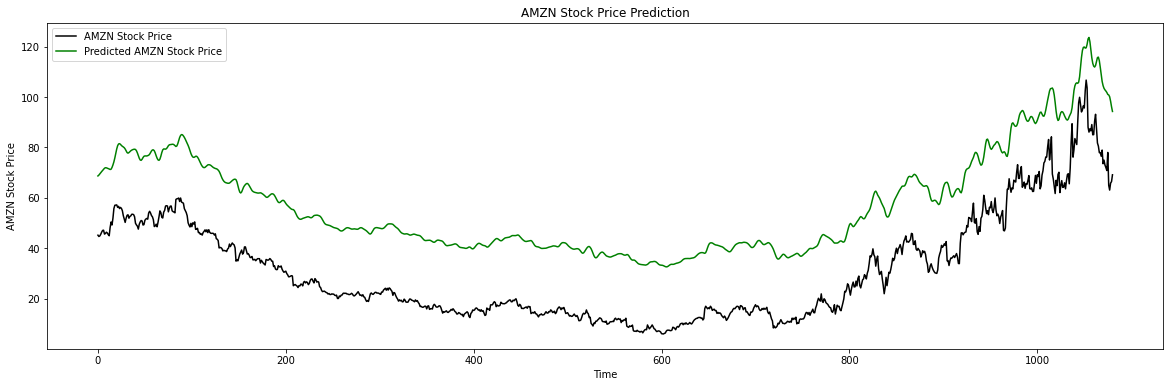

In [53]:
plt.figure(figsize=(20, 6))
plt.plot(y_test_transformed, color = 'black', label = 'AMZN Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

## Merging sentiment data from stock news

### getting data from GCP

In [30]:
from google.cloud import storage
def get_sentiment_news_data_from_gcp(nrows=10000, local=False, optimize=False, **kwargs):
    """method to get the training data (or a portion of it) from google cloud bucket"""
    # Add Client() here
    client = storage.Client()
    if local:
        path = "data/data_data_10Mill.csv"
    else:
        path = "gs://stock-news-pred-bucket/final_stocks_sentiment"
    df = pd.read_csv(path)#add nrows after if you want to select a specific number of row
    return df

In [31]:
sentiment = get_sentiment_news_data_from_gcp()

In [32]:
sentiment = sentiment[['date', 'ticker', 'class_label']]

In [33]:
sentiment = sentiment.loc[sentiment['ticker'] == 'AMZN']

In [34]:
sentiment = sentiment.reset_index(drop=True)

In [35]:
min_date = sentiment["date"].min()

In [36]:
sentiment = sentiment.drop(columns=['ticker'])


In [37]:
sentiment['date'] = pd.to_datetime(sentiment['date'], infer_datetime_format=True)

In [38]:
sentiment['date'].min()

Timestamp('2020-11-02 00:00:00')

In [39]:
merged = df[['date', 'AMZN']]
stock_df = merged[merged["date"]>= "2020-11-02"]

In [40]:
stock_df

,date,AMZN
0,2021-11-29,3561.57
1,2021-11-26,3504.56
2,2021-11-24,3580.41
3,2021-11-23,3580.04
4,2021-11-22,3572.57
...,...,...
266,2020-11-06,3311.37
267,2020-11-05,3322.00
268,2020-11-04,3241.16
269,2020-11-03,3048.41


In [41]:
sentiment["date"] = pd.to_datetime(sentiment["date"])

In [42]:
print(sentiment.dtypes)
print(merged.dtypes)

date           datetime64[ns]
class_label             int64
dtype: object
date    datetime64[ns]
AMZN           float64
dtype: object


In [43]:
merged = pd.merge(stock_df, sentiment, on='date', how='outer')

In [44]:
merged.sort_values(by='date', ascending=True, inplace=True)


In [45]:
merged.reset_index(inplace=True, drop=True)

<AxesSubplot:>

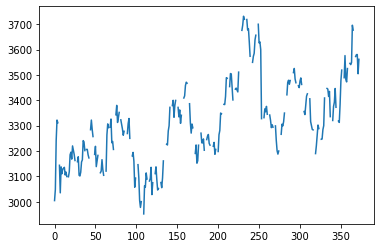

In [46]:
merged["AMZN"].plot()

<AxesSubplot:>

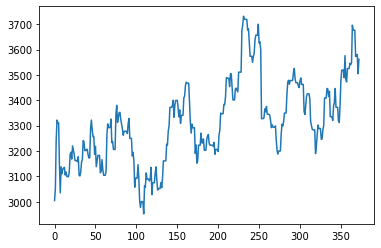

In [47]:
merged["AMZN"].interpolate(method='pad', limit=3).plot()

In [48]:
merged["AMZN"] = merged["AMZN"].interpolate(method='pad', limit=3)

In [50]:
merged.fillna(value=-1, inplace=True)

## Preprocessing data for Model with 2 features (stocks+sentiment)

### Imputing missing values

In [234]:
#merged.fillna(value=-1, inplace = True)

In [51]:
len(merged)

373

In [52]:
df_temp = merged.set_index(["date", "class_label"])

### Scaling stocks again

In [53]:
df_temp = df_temp[["AMZN"]]

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_scaled_temp = scaler.fit_transform(df_temp)


In [55]:
merged["AMZN"] = X_scaled_temp
merged.head(20)

,date,AMZN,class_label
0,2020-11-02,0.067393,0.0
1,2020-11-03,0.123752,-1.0
2,2020-11-04,0.371039,-1.0
3,2020-11-05,0.474752,1.0
4,2020-11-06,0.461114,0.0
5,2020-11-07,0.461114,1.0
6,2020-11-09,0.246055,0.0
7,2020-11-10,0.106574,1.0
8,2020-11-11,0.237908,0.0
9,2020-11-12,0.203128,1.0


In [56]:
merged.to_csv("clean_data_2features.csv")

## Model with 2 Features

In [223]:
arr = merged[["AMZN", "class_label"]].values
merged_arr = arr.reshape(1, len(arr), 2)
merged_arr.shape


(1, 5657, 2)

In [224]:
merged_arr[:10]

array([[[ 0.01878947, -1.        ],
        [ 0.01806875, -1.        ],
        [ 0.01789996, -1.        ],
        ...,
        [ 0.95944443,  0.        ],
        [ 0.95954357, -1.        ],
        [ 0.93922158, -1.        ]]])

In [321]:
merged.head(20)

,date,AMZN,class_label
0,2020-11-02,0.067393,0.0
1,2020-11-03,0.123752,-1.0
2,2020-11-04,0.371039,-1.0
3,2020-11-05,0.474752,1.0
4,2020-11-06,0.461114,0.0
5,2020-11-07,0.461114,1.0
6,2020-11-09,0.246055,0.0
7,2020-11-10,0.106574,1.0
8,2020-11-11,0.237908,0.0
9,2020-11-12,0.203128,1.0


In [322]:
df_1 = merged.set_index(["date"])

### create a train test split

### Plot sequence

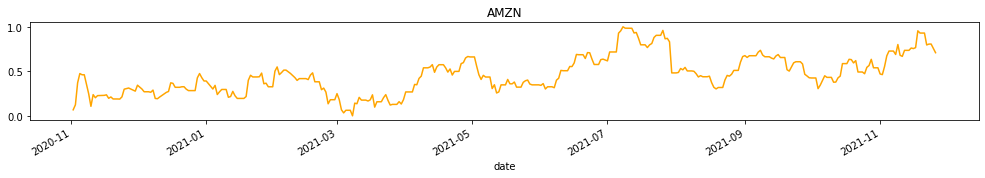

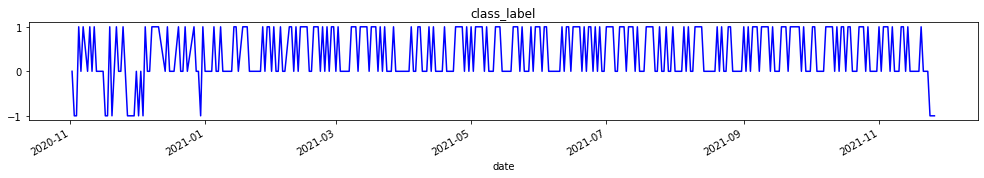

In [323]:
import matplotlib.pyplot as plt
%matplotlib inline

for col in df_1.columns:
    color="orange" if col == "AMZN" else "blue"
    df_1[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()

### Preprare for sentiment

In [324]:
merged = merged[["AMZN", "class_label"]]
merged

,AMZN,class_label
0,0.067393,0.0
1,0.123752,-1.0
2,0.371039,-1.0
3,0.474752,1.0
4,0.461114,0.0
...,...,...
367,0.929644,0.0
368,0.796218,0.0
369,0.805801,0.0
370,0.806276,-1.0


In [325]:
# TODO : create a function to reuse
def train_test_split_series(X):
    train_size = 0.8
    index = round(train_size*X.shape[0])
    X_train = X.iloc[:index]
    X_test = X.iloc[index:]
    return X_train, X_test

X_train, X_test = train_test_split_series(merged)

In [326]:
print(X_train.shape)
print(X_test.shape)

(298, 2)
(74, 2)


### creating the training set 3D (2 Features)

In [328]:
#TODO: create a function to reuse
def create_subsequences_stocks(X):
    X_train = []
    y_train = []
    for i in range(30, len(X)): # 30 = 30 day / 1 month
        X_train.append(X.iloc[i-30:i, 0])
        y_train.append(X.iloc[i, 0])
    X_train_stock, y_train_stock = np.array(X_train), np.array(y_train)
    return X_train_stock, y_train_stock

    
X_train_stock, y_train_stock = create_subsequences_stocks(X_train)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [329]:
X_train_stock

array([[0.06739281, 0.12375234, 0.37103892, ..., 0.27022554, 0.26434968,
        0.28909758],
       [0.12375234, 0.37103892, 0.47475175, ..., 0.26434968, 0.28909758,
        0.19532753],
       [0.37103892, 0.47475175, 0.4611141 , ..., 0.28909758, 0.19532753,
        0.19185077],
       ...,
       [0.43640469, 0.45101737, 0.43879096, ..., 0.71503348, 0.73582993,
        0.68279322],
       [0.45101737, 0.43879096, 0.43879096, ..., 0.73582993, 0.68279322,
        0.66353629],
       [0.43879096, 0.43879096, 0.43879096, ..., 0.68279322, 0.66353629,
        0.66353629]])

In [330]:
#TODO: create a function to reuse
def create_subsequences_sentiment(X):
    X_train = []
    y_train = []
    for i in range(30, len(X)): # 30 = 30 day / 1 month
        X_train.append(X.iloc[i-30:i, 1])
        y_train.append(X.iloc[i, 1])
    X_train_sentiment, y_train_sentiment = np.array(X_train), np.array(y_train)
    return X_train_sentiment, y_train_sentiment

    
X_train_sentiment, y_train_sentiment = create_subsequences_sentiment(X_train)

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [331]:
X_train_sentiment

array([[ 0., -1., -1., ...,  0.,  0.,  1.],
       [-1., -1.,  1., ...,  0.,  1.,  1.],
       [-1.,  1.,  0., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  0.,  1.],
       [ 1.,  1.,  0., ...,  0.,  1.,  1.],
       [ 1.,  0.,  0., ...,  1.,  1.,  1.]])

In [332]:
a = np.expand_dims(X_train_stock, axis=2)

In [333]:
b = np.expand_dims(X_train_sentiment, axis=2)

In [334]:
final_train_arr_3dim = np.concatenate((a,b), axis=2)

In [335]:
final_train_arr_3dim.shape

(268, 30, 2)

In [336]:
X_train.shape

(298, 2)

### creating the test set 3D (2 Features)

In [337]:
#TODO: create a function to reuse
X_test_stock, y_test_stock = create_subsequences_stocks(X_test)

In [338]:
#TODO: create a function to reuse
X_test_sentiment, y_test_sentiment = create_subsequences_sentiment(X_test)

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [339]:
y_test_stock

array([0.42635927, 0.44634747, 0.58639314, 0.58639314, 0.58639314,
       0.63478562, 0.63146281, 0.5941421 , 0.61973674, 0.49213558,
       0.49213558, 0.49213558, 0.47266056, 0.54412029, 0.56518615,
       0.63456752, 0.53945039, 0.53945039, 0.53945039, 0.46976112,
       0.46288456, 0.554294  , 0.67360737, 0.727478  , 0.727478  ,
       0.727478  , 0.68897698, 0.80091345, 0.68008621, 0.66783414,
       0.7353809 , 0.7353809 , 0.7353809 , 0.76171965, 0.75533061,
       0.76597901, 0.95464809, 0.9296436 , 0.9296436 , 0.9296436 ,
       0.79621789, 0.80580145, 0.80627614, 0.70896518])

In [106]:
### concat the 2 arrays of stock and sentiment

In [340]:
c = np.expand_dims(X_test_stock, axis=2)

In [341]:
d = np.expand_dims(X_test_sentiment, axis=2)

In [342]:
final_test_arr_3dim = np.concatenate((c,d), axis=2)

In [353]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, layers

In [344]:
final_train_arr_3dim.shape

(268, 30, 2)

In [372]:
final_test_arr_3dim[0] # 30 chunks per stock and sentiment

array([[0.64816668, 0.        ],
       [0.638968  , 1.        ],
       [0.67205501, 0.        ],
       [0.68802761, 0.        ],
       [0.65503041, 0.        ],
       [0.65503041, 1.        ],
       [0.65503041, 1.        ],
       [0.5180253 , 1.        ],
       [0.50250173, 0.        ],
       [0.54922639, 1.        ],
       [0.59534806, 1.        ],
       [0.60756165, 1.        ],
       [0.60756165, 1.        ],
       [0.60756165, 1.        ],
       [0.58226208, 0.        ],
       [0.4670028 , 1.        ],
       [0.44796398, 0.        ],
       [0.42733431, 0.        ],
       [0.42505068, 0.        ],
       [0.42505068, 1.        ],
       [0.42505068, 1.        ],
       [0.30512149, 0.        ],
       [0.34517486, 0.        ],
       [0.39778821, 0.        ],
       [0.44964463, 0.        ],
       [0.43192723, 1.        ],
       [0.43192723, 1.        ],
       [0.43192723, 1.        ],
       [0.37763323, 1.        ],
       [0.37895466, 0.        ]])

In [370]:
final_test_arr_3dim[:,:,0]

array([[0.64816668, 0.638968  , 0.67205501, ..., 0.43192723, 0.37763323,
        0.37895466],
       [0.638968  , 0.67205501, 0.68802761, ..., 0.37763323, 0.37895466,
        0.42635927],
       [0.67205501, 0.68802761, 0.65503041, ..., 0.37895466, 0.42635927,
        0.44634747],
       ...,
       [0.49213558, 0.47266056, 0.54412029, ..., 0.9296436 , 0.9296436 ,
        0.79621789],
       [0.47266056, 0.54412029, 0.56518615, ..., 0.9296436 , 0.79621789,
        0.80580145],
       [0.54412029, 0.56518615, 0.63456752, ..., 0.79621789, 0.80580145,
        0.80627614]])

In [345]:
final_train_arr_y = final_train_arr_3dim[:,:,0]
final_train_arr_y.shape

(268, 30)

In [346]:
final_train_arr_3dim.shape

(268, 30, 2)

### masking 

In [355]:
from tensorflow.keras.layers import Masking

In [356]:
# –– Data
#final_train_arr_3dim = pad_sequences(final_train_arr_3dim, dtype='float32', padding='post', value=-1)

In [358]:
es = EarlyStopping(patience=30, restore_best_weights=True)

regressor = Sequential()
regressor.add(layers.Masking(mask_value=-1))

regressor.add(LSTM(units = 50, return_sequences = True)) #, input_shape = (final_train_arr_3dim.shape[1], 2))) #final_train_arr_3dim.shape[1]
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(final_train_arr_3dim, final_train_arr_y, epochs = 100, batch_size = 32, validation_split=0.3, callbacks=[es], verbose=1)

Epoch 1/100
6/6 [==============================] - 170s 8s/step - loss: 0.0715 - val_loss: 0.0252
Epoch 2/100
6/6 [==============================] - 4s 631ms/step - loss: 0.0242 - val_loss: 0.1047
Epoch 3/100
6/6 [==============================] - 4s 615ms/step - loss: 0.0191 - val_loss: 0.0442
Epoch 4/100
6/6 [==============================] - 4s 635ms/step - loss: 0.0149 - val_loss: 0.0405
Epoch 5/100
6/6 [==============================] - 4s 610ms/step - loss: 0.0139 - val_loss: 0.0477
Epoch 6/100
6/6 [==============================] - 4s 613ms/step - loss: 0.0132 - val_loss: 0.0284
Epoch 7/100
6/6 [==============================] - 4s 624ms/step - loss: 0.0128 - val_loss: 0.0359
Epoch 8/100
6/6 [==============================] - 4s 630ms/step - loss: 0.0126 - val_loss: 0.0288
Epoch 9/100
6/6 [==============================] - 4s 637ms/step - loss: 0.0121 - val_loss: 0.0307
Epoch 10/100
6/6 [==============================] - 4s 616ms/step - loss: 0.0120 - val_loss: 0.0277
Epoch 11/1

6/6 [==============================] - 4s 727ms/step - loss: 0.0110 - val_loss: 0.0266
Epoch 84/100
6/6 [==============================] - 4s 722ms/step - loss: 0.0112 - val_loss: 0.0253
Epoch 85/100
6/6 [==============================] - 4s 730ms/step - loss: 0.0112 - val_loss: 0.0229
Epoch 86/100
6/6 [==============================] - 4s 688ms/step - loss: 0.0112 - val_loss: 0.0243
Epoch 87/100
6/6 [==============================] - 4s 771ms/step - loss: 0.0112 - val_loss: 0.0238
Epoch 88/100
6/6 [==============================] - 4s 723ms/step - loss: 0.0112 - val_loss: 0.0267
Epoch 89/100
6/6 [==============================] - 4s 684ms/step - loss: 0.0112 - val_loss: 0.0248
Epoch 90/100
6/6 [==============================] - 4s 707ms/step - loss: 0.0113 - val_loss: 0.0225
Epoch 91/100
6/6 [==============================] - 4s 626ms/step - loss: 0.0112 - val_loss: 0.0231
Epoch 92/100
6/6 [==============================] - 4s 641ms/step - loss: 0.0111 - val_loss: 0.0239
Epoch 93/100


## Prediction Model (2Features)

In [398]:
final_test_arr_3dim

array([[[ 0.64816668,  0.        ],
        [ 0.638968  ,  1.        ],
        [ 0.67205501,  0.        ],
        ...,
        [ 0.43192723,  1.        ],
        [ 0.37763323,  1.        ],
        [ 0.37895466,  0.        ]],

       [[ 0.638968  ,  1.        ],
        [ 0.67205501,  0.        ],
        [ 0.68802761,  0.        ],
        ...,
        [ 0.37763323,  1.        ],
        [ 0.37895466,  0.        ],
        [ 0.42635927,  1.        ]],

       [[ 0.67205501,  0.        ],
        [ 0.68802761,  0.        ],
        [ 0.65503041,  0.        ],
        ...,
        [ 0.37895466,  0.        ],
        [ 0.42635927,  1.        ],
        [ 0.44634747,  0.        ]],

       ...,

       [[ 0.49213558,  1.        ],
        [ 0.47266056,  1.        ],
        [ 0.54412029,  0.        ],
        ...,
        [ 0.9296436 ,  1.        ],
        [ 0.9296436 ,  0.        ],
        [ 0.79621789,  0.        ]],

       [[ 0.47266056,  1.        ],
        [ 0.54412029,  0.  

In [378]:
predicted_stock_price = regressor.predict(final_test_arr_3dim)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


In [386]:
predicted_stock_price.shape

(44, 1)

In [400]:
y_test = np.array(X)

In [401]:
y_test_transformed = scaler.inverse_transform(y_test)

In [402]:
y_test_transformed.shape

(44, 1)

### Plotting results again

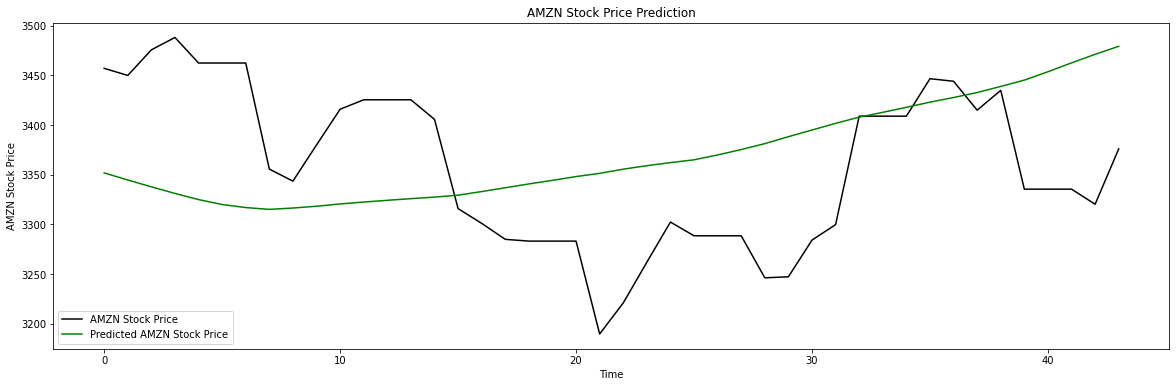

In [403]:
plt.figure(figsize=(20, 6))
plt.plot(y_test_transformed, color = 'black', 
         label = 'AMZN Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()

## Model with 3 Features

In [ ]:
#load twitter sentiment dataset @Sameer
#check if there is just 1 information per day

In [ ]:
# merge dataset with merged

In [ ]:
# train test split


# ATTENTION adapt the code below to the new data set!!!!

In [ ]:
# TODO : create a function to reuse

train_size = 0.8
index = round(train_size*merged.shape[0])
merged_train = merged.iloc[:index]
merged_test = merged.iloc[index:]

In [ ]:
print(merged_train.shape)
print(merged_test.shape)

### creating the training set 3D (2 Features)

In [ ]:
#TODO: create a function to reuse
X_train = []
y_train = []
for i in range(25, 4525):
    X_train.append(merged_train.iloc[i-25:i, 0])
    y_train.append(merged_train.iloc[i, 0])
X_train_stock, y_train_stock = np.array(X_train), np.array(y_train)

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train_stock

In [ ]:
#TODO: create a function to reuse
X_train = []
y_train = []
for i in range(25, 4525):
    X_train.append(merged_train.iloc[i-25:i, 1])
    y_train.append(merged_train.iloc[i, 1])
X_train_sentiment, y_train_sentiment = np.array(X_train), np.array(y_train)

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train_sentiment

In [ ]:
a = np.expand_dims(X_train_stock, axis=2)

In [ ]:
b = np.expand_dims(X_train_sentiment, axis=2)

In [ ]:
final_train_arr_3dim = np.concatenate((a,b), axis=2)

In [ ]:
final_train_arr_3dim.shape

In [ ]:
X_train.shape

### creating the test set 3D (2 Features)

In [ ]:
#TODO: create a function to reuse
X_test = []
y_test = []
for i in range(30, 1131):
    X_test.append(merged_test.iloc[i-30:i, 1])
    y_test.append(merged_test.iloc[i, 1])
X_test_sentiment, y_test_sentiment = np.array(X_test), np.array(y_test)

In [ ]:
y_test_stock.shape

In [ ]:
### concat the 2 arrays of stock and sentiment

In [ ]:
c = np.expand_dims(X_test_stock, axis=2)

In [ ]:
d = np.expand_dims(X_test_sentiment, axis=2)

In [ ]:
final_test_arr_3dim = np.concatenate((c,d), axis=2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
final_train_arr_3dim.shape

In [ ]:
final_train_arr_y = final_train_arr_3dim[:,:,0]

In [ ]:
es = EarlyStopping(patience=30, restore_best_weights=True)

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (final_train_arr_3dim.shape[1], 2)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(final_train_arr_3dim, final_train_arr_y, epochs = 100, batch_size = 32, validation_split=0.3, callbacks=[es])

## Prediction Model (2Features)

In [ ]:
predicted_stock_price = regressor.predict(final_test_arr_3dim)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_transformed = final_test_arr_3dim[:,:,0]

### Plotting results again

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y_test_transformed, color = 'black', label = 'AMZN Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()